In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
dataset=pd.read_csv(r"D:\Different Data\\Machine Learning\\Python Coding\\Datasets\\HousingData.csv")
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [6]:
dataset.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [16]:
for column in dataset.columns:
    if dataset[column].isnull().any():
        if dataset[column].dtype=="object":
            mode_value=dataset[column].mode()[0]
            dataset[column].fillna(mode_value,inplace=True)

        else:
            mean_value=dataset[column].mean()
            dataset[column].fillna(mean_value,inplace=True)

print("Number of null values after filling:")
print(dataset.isnull().sum())


print(" cleaned dataset")
print(dataset.head(2))


Number of null values after filling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
 cleaned dataset
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6  


In [20]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
corr=dataset.corr()

<Axes: >

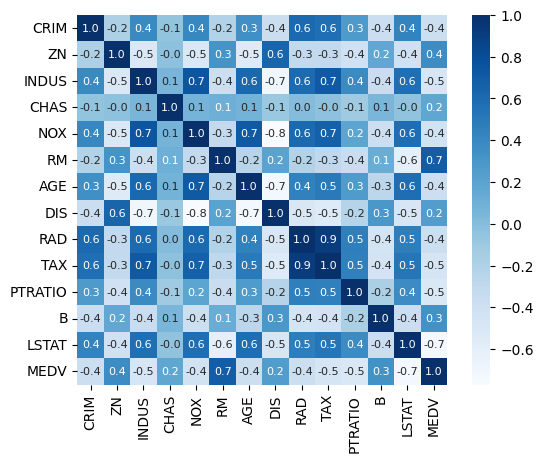

In [27]:
# construct a heatmap to understand corelation
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

In [29]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [35]:
# Training our model by using XGBRegressor
from xgboost import XGBRegressor

model=XGBRegressor()
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
train_data_predication=model.predict(x_train)

In [37]:
from sklearn import metrics

In [41]:
# R_Squared_error
score_1=metrics.r2_score(y_train,train_data_predication)

score_1

0.9999950528144836

In [42]:
# Mean_Absolute_error
score_2=metrics.mean_absolute_error(y_train,train_data_predication)
score_2

0.01409899716330045

In [43]:
test_data_predication=model.predict(x_test)

In [44]:
# R_Squared_error
score_1=metrics.r2_score(y_test,test_data_predication)

score_1

0.9149410128593445

In [45]:
# Mean_Absolute_error
score_2=metrics.mean_absolute_error(y_test,test_data_predication)
score_2

1.9481419011658312

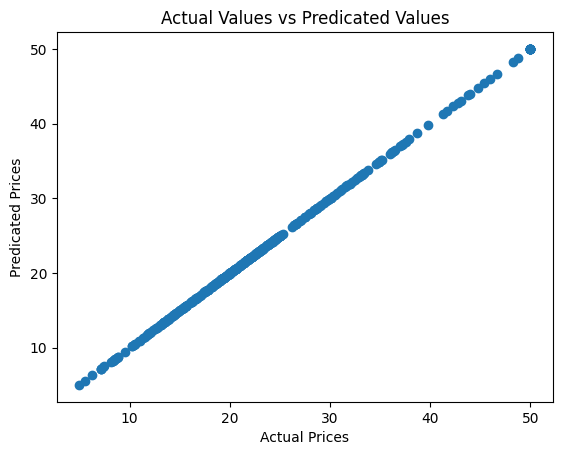

In [46]:
# Visulaizing actual prices and predicated prices
plt.scatter(y_train,train_data_predication)
plt.xlabel("Actual Prices")
plt.ylabel("Predicated Prices")
plt.title("Actual Values vs Predicated Values")
plt.show()

In [49]:
import numpy as np

# Assuming xgb_model is already trained and available
# Define the feature names for easy reference
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Input values for the features in the same order as above
# Example input for a new house (replace these values with actual inputs)
new_house_data = np.array([[0.00632, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 369.9, 4.98, 24]])

# Predict the price of the house using the trained model
predicted_price = model.predict(new_house_data)

print(f"Predicted Price of the house: {predicted_price[0]}")


Predicted Price of the house: 27.24390411376953
